In [870]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [871]:
# Load data
df = pd.read_csv('titanic.csv',  sep=',', decimal=',', encoding='windows-1251')


In [872]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    object
 4   Sex          891 non-null    object
 5   Age          714 non-null    object
 6   SibSp        891 non-null    int64 
 7   Parch        891 non-null    int64 
 8   Ticket       891 non-null    object
 9   Fare         891 non-null    object
 10  Cabin        204 non-null    object
 11  Embarked     889 non-null    object
dtypes: int64(5), object(7)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,NaN,S


In [873]:
# Data preparation and exploration
# Remove irrelevant columns
df = df.drop(columns=['PassengerId', 'Name'])

In [874]:
df['Pclass'] = df['Pclass'].astype(str)

In [875]:
df_train, df_test = train_test_split(
    df,
    test_size=0.2,
    random_state=1
)
df_train.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
301,1,3,male,NaN,2,0,367226,23.25,NaN,Q
309,1,1,female,30,0,0,PC 17485,56.9292,E36,C
516,1,2,female,34,0,0,C.A. 34260,10.5,F33,S
120,0,2,male,21,2,0,S.O.C. 14879,73.5,NaN,S
570,1,2,male,62,0,0,S.W./PP 752,10.5,NaN,S


In [876]:
df_train.shape, df_test.shape

((712, 10), (179, 10))

In [877]:
df_train['Survived'].sum()

269

In [878]:
df_train['Survived'].count() - df_train['Survived'].sum()

443

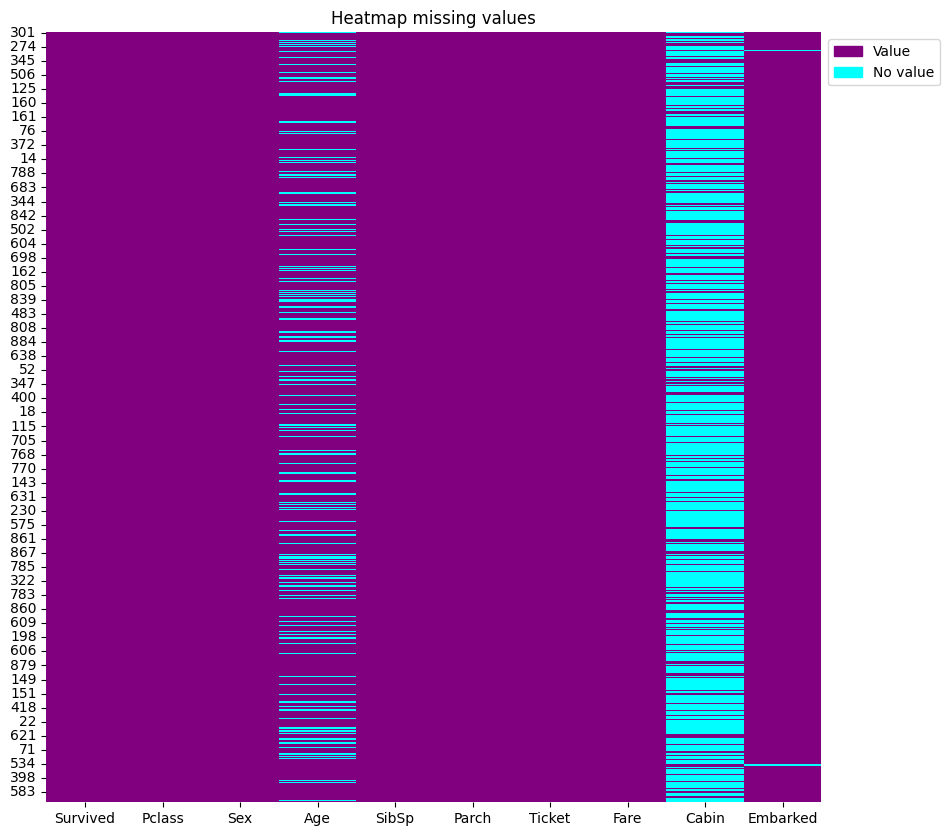

In [879]:
plt.figure(figsize=(10, 10))

value_is = mpatches.Patch(color='purple', label='Value')
value_not = mpatches.Patch(color='aqua', label='No value')

plt.title('Heatmap missing values')
plt.legend(handles=[value_is, value_not], bbox_to_anchor=(1, 1), loc='upper left')

colours = ['purple', 'aqua']
sns.heatmap(
    df_train.isna(), cbar=False,
    cmap=sns.color_palette(colours),
)

plt.show()

In [880]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isna().mean() * 100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data.head()

,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
Survived,0,0.000000
Pclass,0,0.000000


In [881]:
df_train = df_train.drop(columns=['Cabin', 'Ticket'])
df_test = df_test.drop(columns=['Cabin', 'Ticket'])

In [882]:
df_train = df_train.fillna(df_train.mean())
df_test = df_test.fillna(df_test.mean())

df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])
df_test['Embarked'] = df_test['Embarked'].fillna(df_train['Embarked'].mode()[0])

df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mode()[0])
df_test['Age'] = df_test['Age'].fillna(df_train['Age'].mode()[0])

/var/folders/pl/17z0ddz94xs40jk4spqp7bwc0000gn/T/ipykernel_60617/3679741052.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train = df_train.fillna(df_train.mean())
/var/folders/pl/17z0ddz94xs40jk4spqp7bwc0000gn/T/ipykernel_60617/3679741052.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_test = df_test.fillna(df_test.mean())


In [883]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isna().mean() * 100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data.head()

,Total,Percent
Survived,0,0.0
Pclass,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0


In [884]:
total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isna().mean() * 100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data.head()

,Total,Percent
Survived,0,0.0
Pclass,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0


In [885]:
all_features = pd.concat([df_train, df_test]).reset_index(drop=True)

In [886]:
all_features = pd.get_dummies(all_features)

In [887]:
df_train = all_features.iloc[:df_train.shape[0], :]
df_test = all_features.iloc[df_train.shape[0]:, :]

In [888]:
# Split data into training and testing sets
X_train = df_train.drop(columns='Survived')
y_train = df_train['Survived']

X_test = df_test.drop(columns='Survived')
y_test = df_test['Survived']


In [889]:
X_train

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_0.42,Age_0.67,Age_0.75,...,Fare_9.825,Fare_9.8375,Fare_9.8417,Fare_9.8458,Fare_90,Fare_91.0792,Fare_93.5,Embarked_C,Embarked_Q,Embarked_S
0,2,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
708,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
709,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
710,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [890]:
# Build and evaluate models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier(max_depth=3, random_state=1)),
    ('Random Forest', RandomForestClassifier(max_depth=5)),
    ('AdaBoost Classifier', AdaBoostClassifier(learning_rate=0.3))
]
i = 0
best = ''
for name, model in models:
    # Train model
    model.fit(X_train, y_train)

    scores = cross_val_score(model, X_train, y_train, cv=5)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Evaluate model performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name}: \nScores - {scores} \nScores mean - {scores.mean()} \nAccuracy -  {accuracy:}\n')

    if accuracy>i:
        i = accuracy
        best = name

print(f'Best model is {best}')

Logistic Regression: 
Scores - [0.75524476 0.7972028  0.82394366 0.83802817 0.79577465] 
Scores mean - 0.8020388062641584 
Accuracy -  0.7932960893854749

Decision Tree: 
Scores - [0.7972028  0.8041958  0.83098592 0.85211268 0.80985915] 
Scores mean - 0.8188712695754947 
Accuracy -  0.770949720670391

Random Forest: 
Scores - [0.7972028  0.79020979 0.8028169  0.80985915 0.78873239] 
Scores mean - 0.7977642076233626 
Accuracy -  0.7486033519553073

AdaBoost Classifier: 
Scores - [0.72727273 0.79020979 0.78873239 0.83802817 0.78873239] 
Scores mean - 0.7865950950457992 
Accuracy -  0.7821229050279329

Best model is Logistic Regression
